In [1]:
from mcspace.utils import pickle_load
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
pwd

'C:\\Users\\Gary2\\Dropbox (Partners HealthCare)\\research_bwh\\MCSPACE\\MCSPACE\\mcspace\\paper\\figures'

In [3]:
cvpath = Path("../cross_validation")

In [4]:
respath = cvpath / "cv_holdout_results"

In [5]:
res = pickle_load(respath / "results.pkl")

In [7]:
res = pd.DataFrame(res)

In [8]:
res

,model,case,fold,read depth,particle id,cosine distance
0,mcspace,Human_1_H11,0,1226.0,0,0.024706
1,mcspace,Human_1_H11,0,3430.0,1,0.503679
2,mcspace,Human_1_H11,0,7284.0,2,0.761661
3,mcspace,Human_1_H11,0,6348.0,3,0.160995
4,mcspace,Human_1_H11,0,8145.0,4,0.125132
...,...,...,...,...,...,...
479,gmm_two_dim,Human_1_H11,0,3901.0,116,0.448669
480,gmm_two_dim,Human_1_H11,0,3307.0,117,0.552198
481,gmm_two_dim,Human_1_H11,0,2249.0,118,0.547965
482,gmm_two_dim,Human_1_H11,0,2671.0,119,0.463618


In [9]:
res['model'].unique()

array(['mcspace', 'gmm_basic', 'gmm_one_dim', 'gmm_two_dim'], dtype=object)

<Axes: xlabel='model', ylabel='cosine distance'>

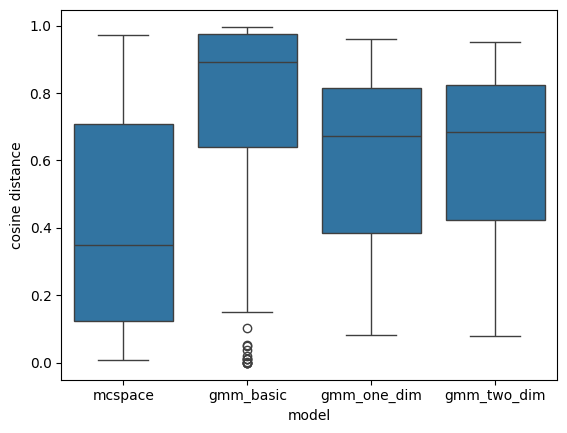

In [10]:
sns.boxplot(data=res, x='model', y='cosine distance')